In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder # Import LabelEncoder here
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib
# ... (rest of the code)

In [13]:
!curl -L https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip -o bank.zip

# Unzip the dataset
!unzip bank.zip

# Load CSV
df = pd.read_csv('bank-full.csv', delimiter=';')

# Preview the dataset
print(df.head())


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  565k    0  565k    0     0   510k      0 --:--:--  0:00:01 --:--:--  511k
Archive:  bank.zip
  inflating: bank-full.csv           
  inflating: bank-names.txt          
  inflating: bank.csv                
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB
None
age          0
job          0
marital      0
education    0
default      0
balance      0
hous

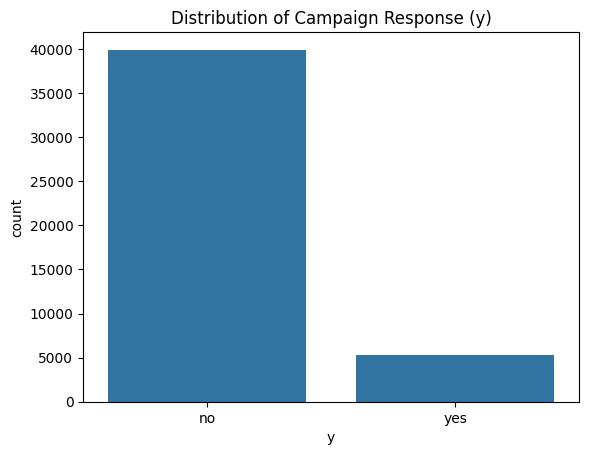

In [14]:
# Check info and data types
print(df.info())

# Check for missing values
print(df.isnull().sum())

# Describe dataset (summary statistics)
print(df.describe())

# Visualize the distribution of target variable (response)
sns.countplot(x='y', data=df)
plt.title('Distribution of Campaign Response (y)')
plt.show()

In [18]:
# Encode categorical variables (e.g., 'job', 'marital', 'education', etc.)
label_encoder = LabelEncoder()

# Apply encoding to categorical columns
# 'day_of_week' is not present in the dataset; it is likely 'day'
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day', 'poutcome']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Convert the target variable ('y') into 0 and 1
df['y'] = df['y'].map({'yes': 1, 'no': 0})

# Define features and target
X = df.drop('y', axis=1)  # All columns except the target column
y = df['y']  # Target column

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
model = RandomForestClassifier(random_state=42)


In [20]:
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Accuracy: 0.90


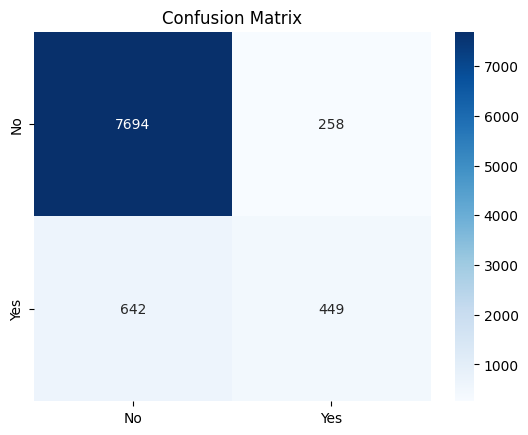

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.64      0.41      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



In [21]:
y_pred = model.predict(X_test)

# Accuracy score
print(f'Accuracy: {accuracy_score(y_test, y_pred):.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No", "Yes"], yticklabels=["No", "Yes"])
plt.title("Confusion Matrix")
plt.show()

# Classification report
print(classification_report(y_test, y_pred))
